In [1]:
#EDA (Exploratory data analysis)

In [2]:
import pandas as pd

In [3]:
import ipywidgets as widgets

In [4]:
import seaborn as sns

In [5]:
from pysentimiento.preprocessing import preprocess_tweet

2024-04-25 14:47:30.064349: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 14:47:30.099672: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 14:47:30.099699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 14:47:30.100623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 14:47:30.106379: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

In [6]:
#Helper Functions

In [7]:
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [8]:
#Read Data

In [9]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ['data/raw_dataset-01.csv',
                      'data/raw_dataset-02.csv',
                      'data/raw_dataset-03.csv',
                      'data/raw_dataset-04.csv',
                      'data/raw_dataset-05.csv']), ignore_index=True) 
# print(df) 

# df = pd.read_csv(r'data/raw_dataset-01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11835 non-null  object
 1   label   11835 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 185.0+ KB


In [10]:
import re
from typing import Union, List
import string

class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text
# r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"
clean = CleanText(clean_pattern=r"[^A-ZÁÉÍÓÚÜÑÇĞÜŞİÖÇIa-záéíóúüñçğüışöçĞÜŞİÖÇI'öşöç0-9.\"',()]")

In [11]:
def remove_accent(text):
    # Regex para identificar caracteres no deseados
    regex = r"[^A-ZÁÉÍÓÚÜÑÇĞÜŞİÖÇIa-záéíóúüñçğüışöçĞÜŞİÖÇI'öşöç0-9.\"',()]"
    
    # Reemplazar caracteres no deseados por una cadena vacía
    texto_limpio = re.sub(regex, ' ', text)
    texto_limpio = re.sub(r'\s+', ' ', texto_limpio)  # Reemplazar múltiples espacios por uno solo

    
    return texto_limpio

In [12]:
texto_limpiado = clean("¡Hola, cómo estás? ¡Todo bien aquí! 12345")
print(texto_limpiado)

[[' Hola, cómo estás   Todo bien aquí  12345']]


In [13]:
!pip install unidecode

In [14]:
from unidecode import unidecode

texto_con_tildes = "¡Hola, cómo estás? ¡Todo bien aquí! 12345"

texto_sin_tildes = unidecode(texto_con_tildes)

print("Texto original:")
print(texto_con_tildes)
print("\nTexto sin tildes:")
print(texto_sin_tildes)

Texto original:
¡Hola, cómo estás? ¡Todo bien aquí! 12345

Texto sin tildes:
!Hola, como estas? !Todo bien aqui! 12345


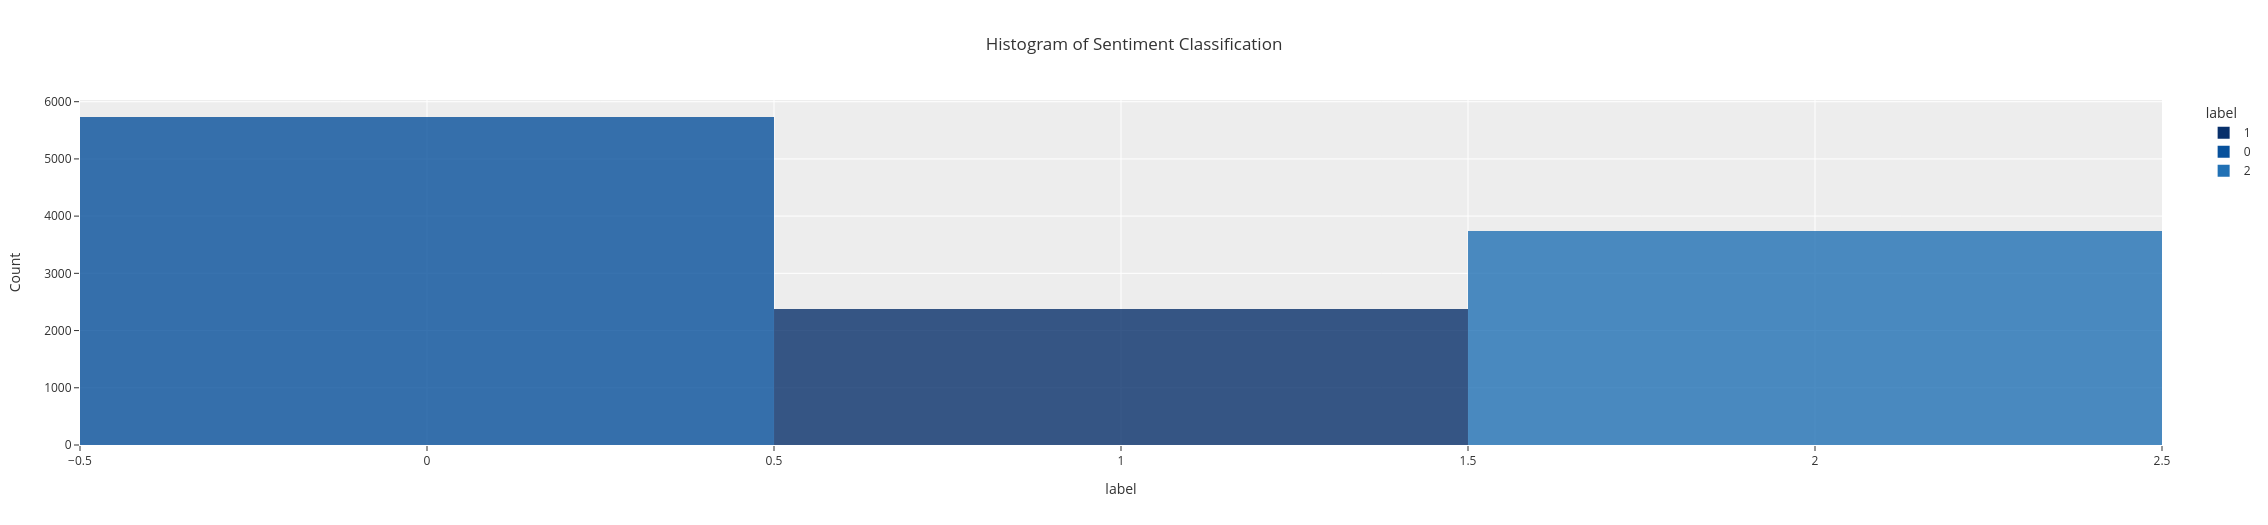

In [15]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# count of ratings
fig = px.histogram(df,
             x = 'label',
             title = 'Histogram of Sentiment Classification',
             template = 'ggplot2',
             color = 'label',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [16]:
# encode label and mapping label name
#df["label"] = df["label"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [17]:
# clean text, lowercase and remove punk
# df["text"] = df["text"].apply(lambda x: preprocess_tweet(x))
df["text_original"] = df["text"]
#df["text"] = df["text"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))
df["text"] = df["text"].apply(lambda x: preprocess_tweet(x.lower(), demoji=False))

In [18]:
df.head()

text  label label_name text_original
0    oe chacal      1    Neutral     Oe Chacal
1    anda vete      0   Negative     Anda vete
2   a la firme      1    Neutral    a la firme
3   chau, cojo      0   Negative    Chau, cojo
4  tengo plata      1    Neutral   Tengo plata

In [19]:
df.sample(n = 30)

text  label label_name  \
6853   que bueno que estes mejor,carlita era nuestro ...      0   Negative   
4021   que se puede esperar de un dizque influencers ...      0   Negative   
7214   karo, hay que llevar nuestro arroz con pollo c...      1    Neutral   
10370  es 6 mil soles oe ridiculos mentirosos ahora i...      0   Negative   
8351   yenny macha vamos un fin de semana 😋😋 que dices 😀      1    Neutral   
8836   como dijo mi pata galdós. me lo pierdo de toda...      0   Negative   
2900   hay que actuar mejor con esos "heroes" ha... m...      0   Negative   
6178   que les pasá a estos señores, creen que nos he...      0   Negative   
2779   gana como m y no sabe hablar, palta tener que ...      0   Negative   
1913   webada el gordo de esclavo la otra chateando c...      0   Negative   
10643                  el mejor muchos éxitos francooo 😀      2   Positive   
136                                 que se joda la vieja      0   Negative   
1520   willax el mejor canal en destapar mentiras y n...      0   Negative   
9457   ¡¡ ahora entendemos todo !!! le hicieron la ca...      0   Negative   
2339   seguimos esperando la moción de censura contra...      0   Negative   
7986   en ese momento peso pluma dejo de cantar los c...      1    Neutral   
2414   y esta? 🤣  jaja ahora es un orgullo ser only f...      0   Negative   
7984                 obvio tipo tengo depresión manyas 😂      0   Negative   
3583   de seguro ella misma armó eso😃 le fascina llam...      0   Negative   
3870   podrán jamás ! más clarito  que el agua  jaja ...      0   Negative   
7485   richard soto lara y marcelo andres acevedo sig...      2   Positive   
1754   muy buena felicitaciones 👏 rosana por tirar al...      2   Positive   
2154           mongaaa nuestro jugadoraso se.disee 😅😅😅😊😊      0   Negative   
4541                    no seas sobon bigote de brocha 😅      0   Negative   
3067   cesar garcia lucana con yohan rojas wachapea c...      0   Negative   
8450   elias montalvo contreras como ese telo...ningu...      1    Neutral   
3201   me gustó mucho su presentación, ya que imitó a...      2   Positive   
10141  pero lo cuentas cuanto te metan a la cana loqu...      2   Positive   
9349   hacer público la vida de las personas se gana ...      0   Negative   
11805  quie te as creído  rosa cueva  de tirar igual ...      0   Negative   

                                           text_original  
6853   Que bueno que estes mejor,Carlita era nuestro ...  
4021   Que se puede esperar de un dizque influencers ...  
7214   Karo, hay que llevar nuestro arroz con pollo c...  
10370  Es 6 mil soles oe ridiculos mentirosos ahora i...  
8351   Yenny Macha vamos un fin de semana 😋😋 que dices 😀  
8836   Como dijo mi pata Galdós. Me lo pierdo de toda...  
2900   Hay que actuar mejor con esos "heroes" ha... M...  
6178   Que les pasá a estos señores, creen que nos he...  
2779   Gana como m y no sabe hablar, palta tener que ...  
1913   Webada el gordo de esclavo la otra chateando c...  
10643                El mejor muchos éxitos Francooooo 😀  
136                                 Que se joda la vieja  
1520   Willax el mejor canal en destapar mentiras y n...  
9457   ¡¡ Ahora entendemos todo !!!!! Le hicieron la ...  
2339   Seguimos esperando la moción de censura contra...  
7986   En ese momento peso pluma dejo de cantar los c...  
2414   Y esta? 🤣  jajajaja ahora es un orgullo ser on...  
7984                 Obvio tipo tengo depresión manyas 😂  
3583   De seguro ella misma armó eso😃 le fascina llam...  
3870   Podrán jamás ! más clarito  que el agua  jajja...  
7485   Richard Soto Lara y Marcelo Andres Acevedo sig...  
1754   Muy buena felicitaciones 👏 Rosana por tirar al...  
2154           Mongaaa nuestro jugadoraso se.disee 😅😅😅😊😊  
4541                    No seas sobon bigote de brocha 😅  
3067   Cesar Garcia Lucana con Yohan Rojas Wachapea c...  
8450   Elias Montalvo Contreras como ese telo...ningu...  
3201   Me gustó mucho su presentación, y

In [20]:
#Visualizations

In [21]:
#Word Cloud

In [22]:
from wordcloud import WordCloud


In [23]:

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [24]:

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish'))
stopwords.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja", "jjaja"])
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


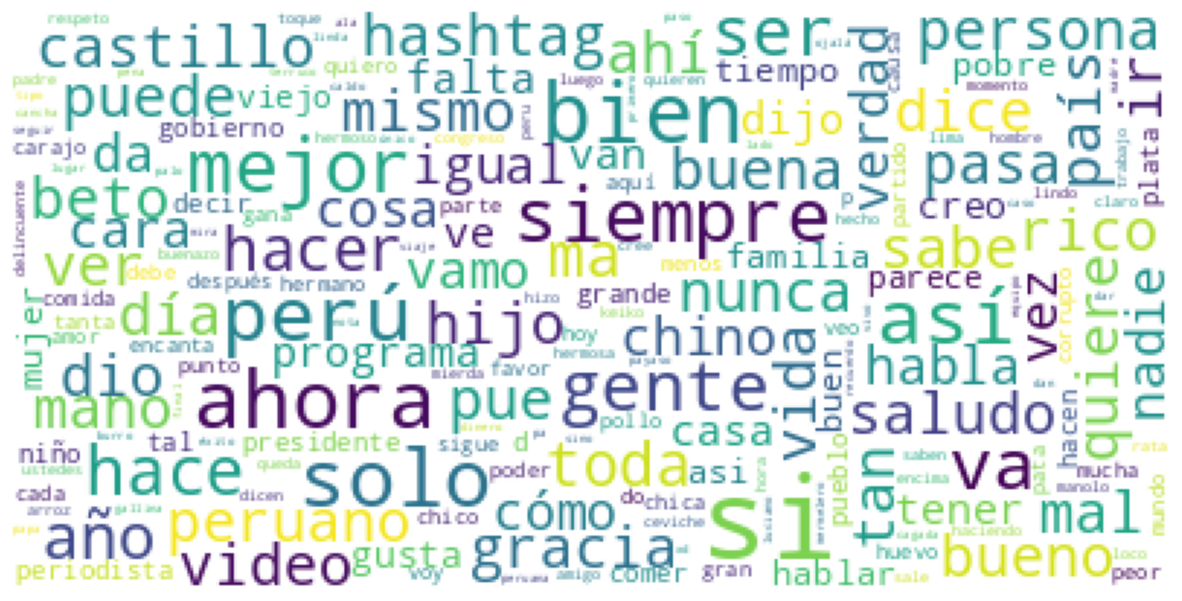

In [25]:
show_wordcloud(df["text"].values)

In [26]:
#Target Count

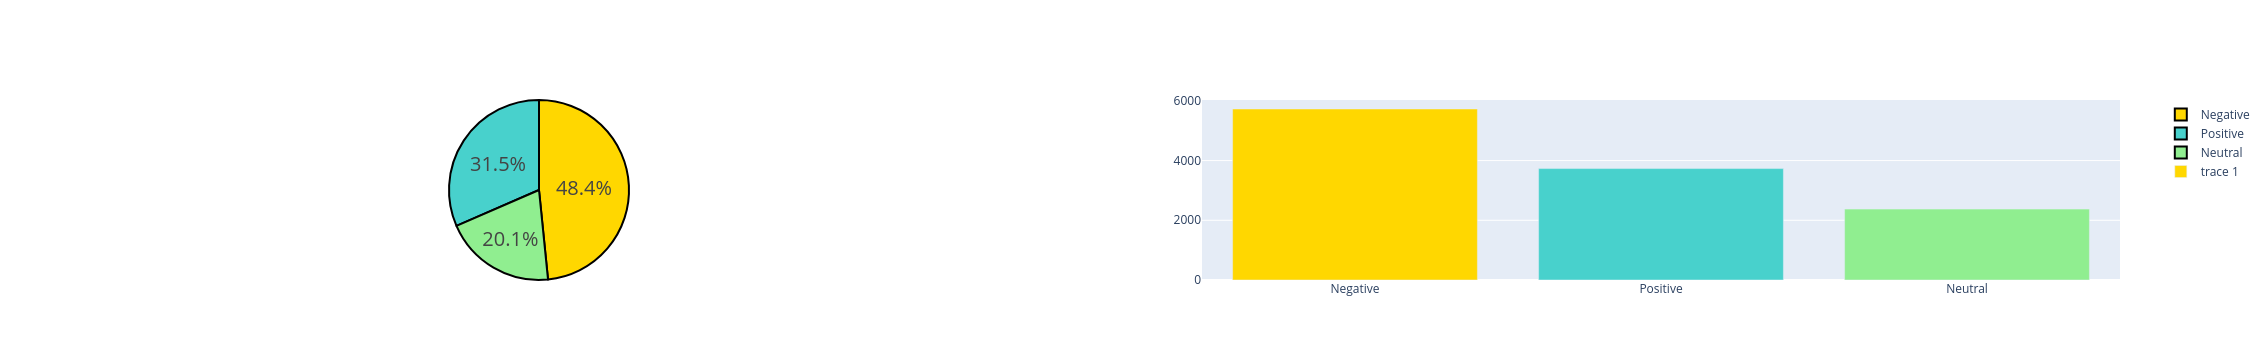

In [27]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

# Token Counts with simple tokenizer¶

In [28]:
# tokenize data
#df["tokenized_text"] = df.text.apply(lambda x: tokenize(x))
df["tokenized_text"] = df.text.apply(lambda x: preprocess_tweet(x, demoji=False))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_text"].apply(lambda x: len(x.split()))

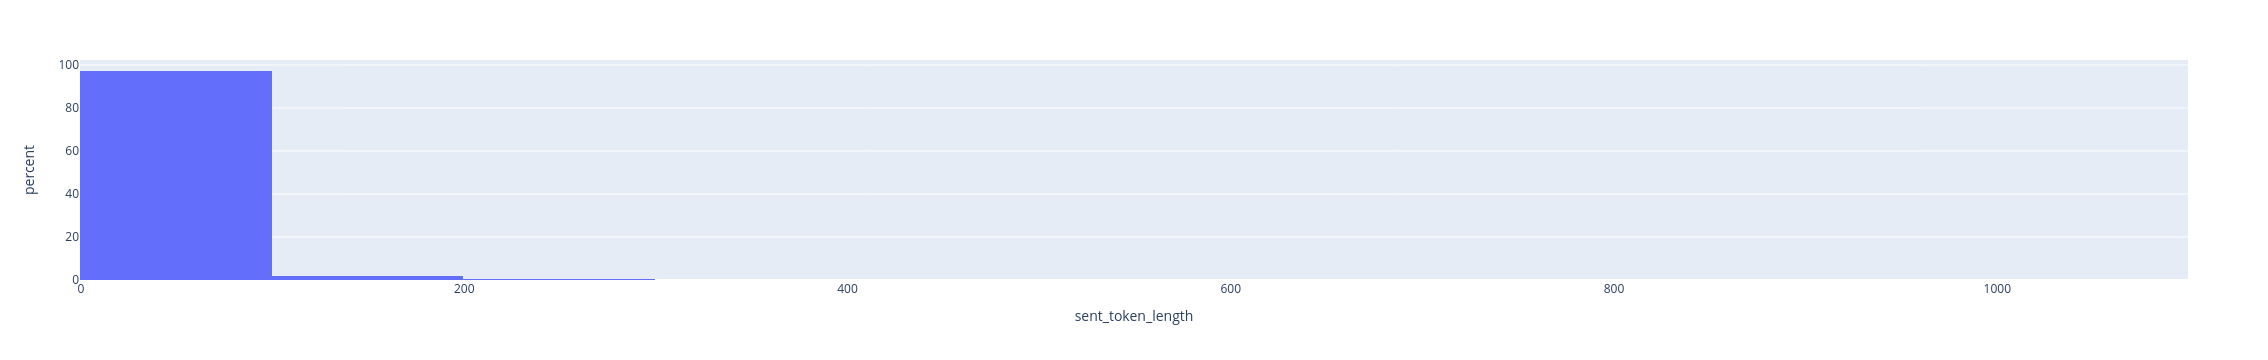

In [29]:
fig = px.histogram(df, x="sent_token_length", nbins=20, barmode='group', histnorm="percent")
fig.show()

In [30]:
(df.sent_token_length < 200).mean()

0.9921419518377693

In [31]:
#Token Counts with roBERTuito tokenizer

In [32]:
from transformers import AutoTokenizer
model_name = "pysentimiento/robertuito-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [33]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

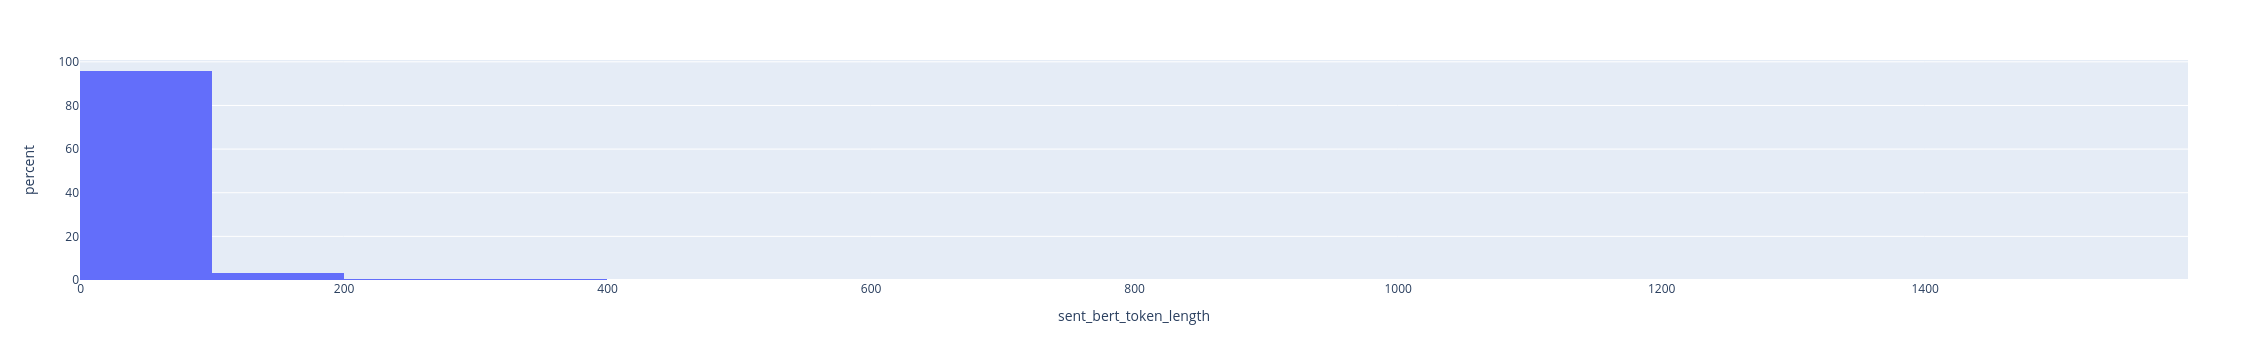

In [34]:
fig = px.histogram(df, x="sent_bert_token_length", nbins=20, barmode='group', histnorm="percent")
fig.show()

In [35]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 200).mean()

0.9895226024503591

In [36]:
#Characters Count in the Data

In [37]:

# valvulate char count for each review
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.histplot(df.loc[:, feature],
                 # kde=True,
                 ax=ax1,
                  binrange=(0, 800)
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

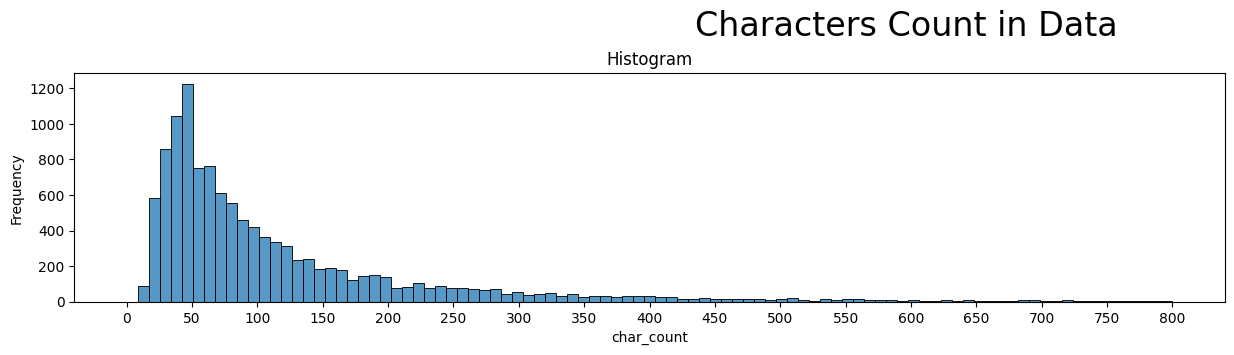

In [38]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

# Reviews Lengths

In [39]:
# Creating a new feature for the visualization.
df['Character Count'] = df['text'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    sns.set_theme()
    sns.set_context("paper")
    sns.set_palette("mako")

    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    
    sns.histplot(df.loc[:, feature],
                 # hist=True,
                 kde=True,
                 ax=ax1)
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.

    sns.histplot(df.loc[:, feature],
                 ax=ax2,
                 kde=True,
                 kde_kws={'cumulative': True})
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

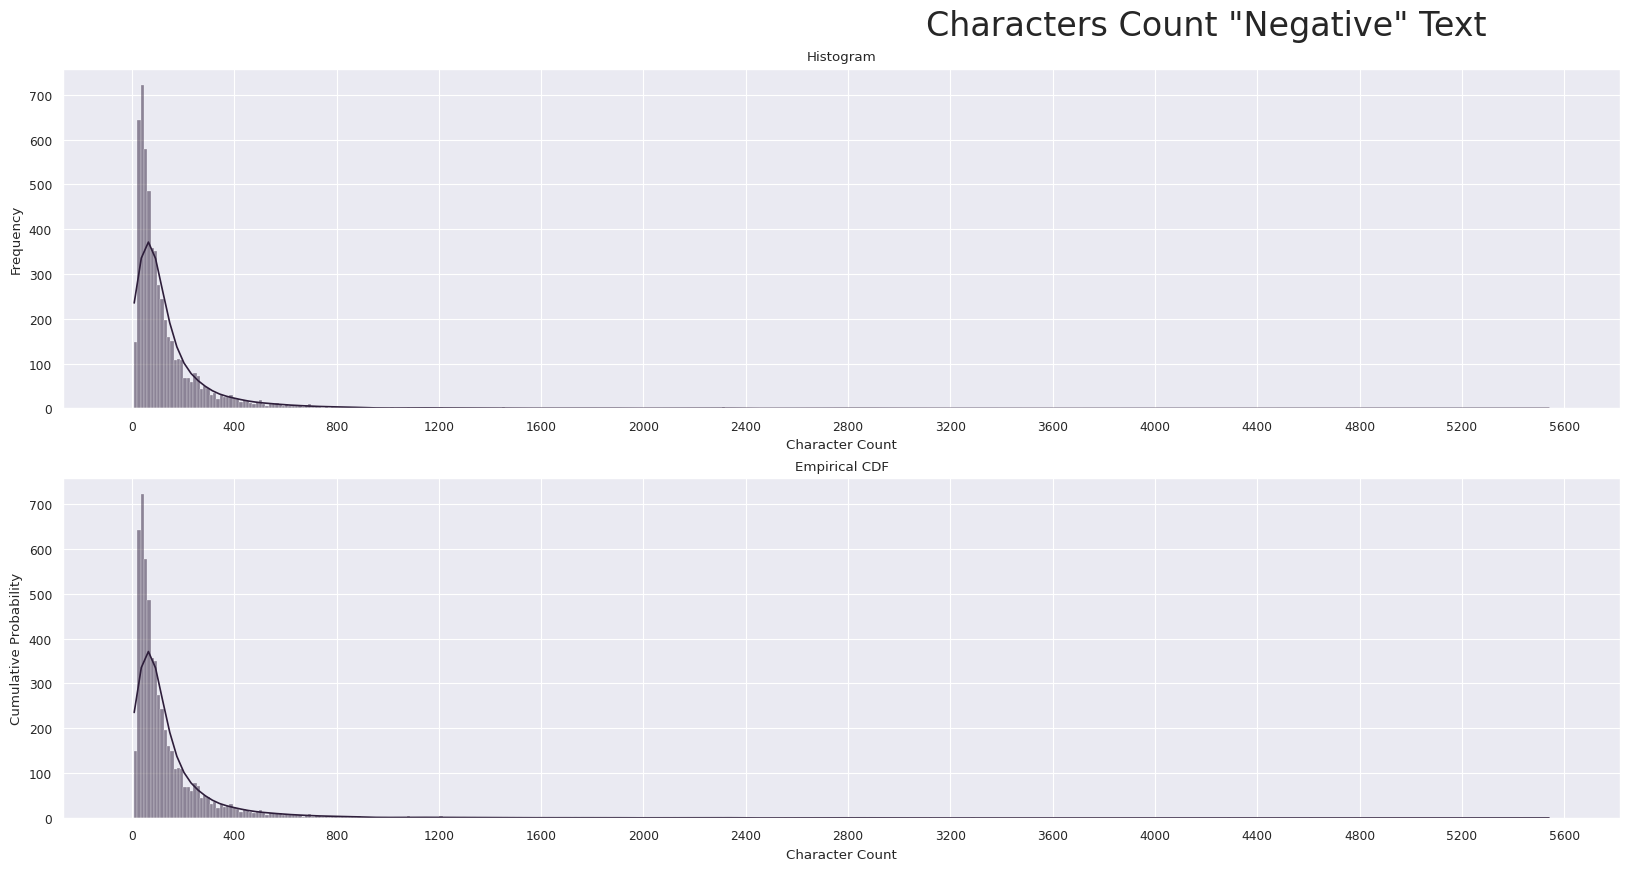

In [40]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Text')

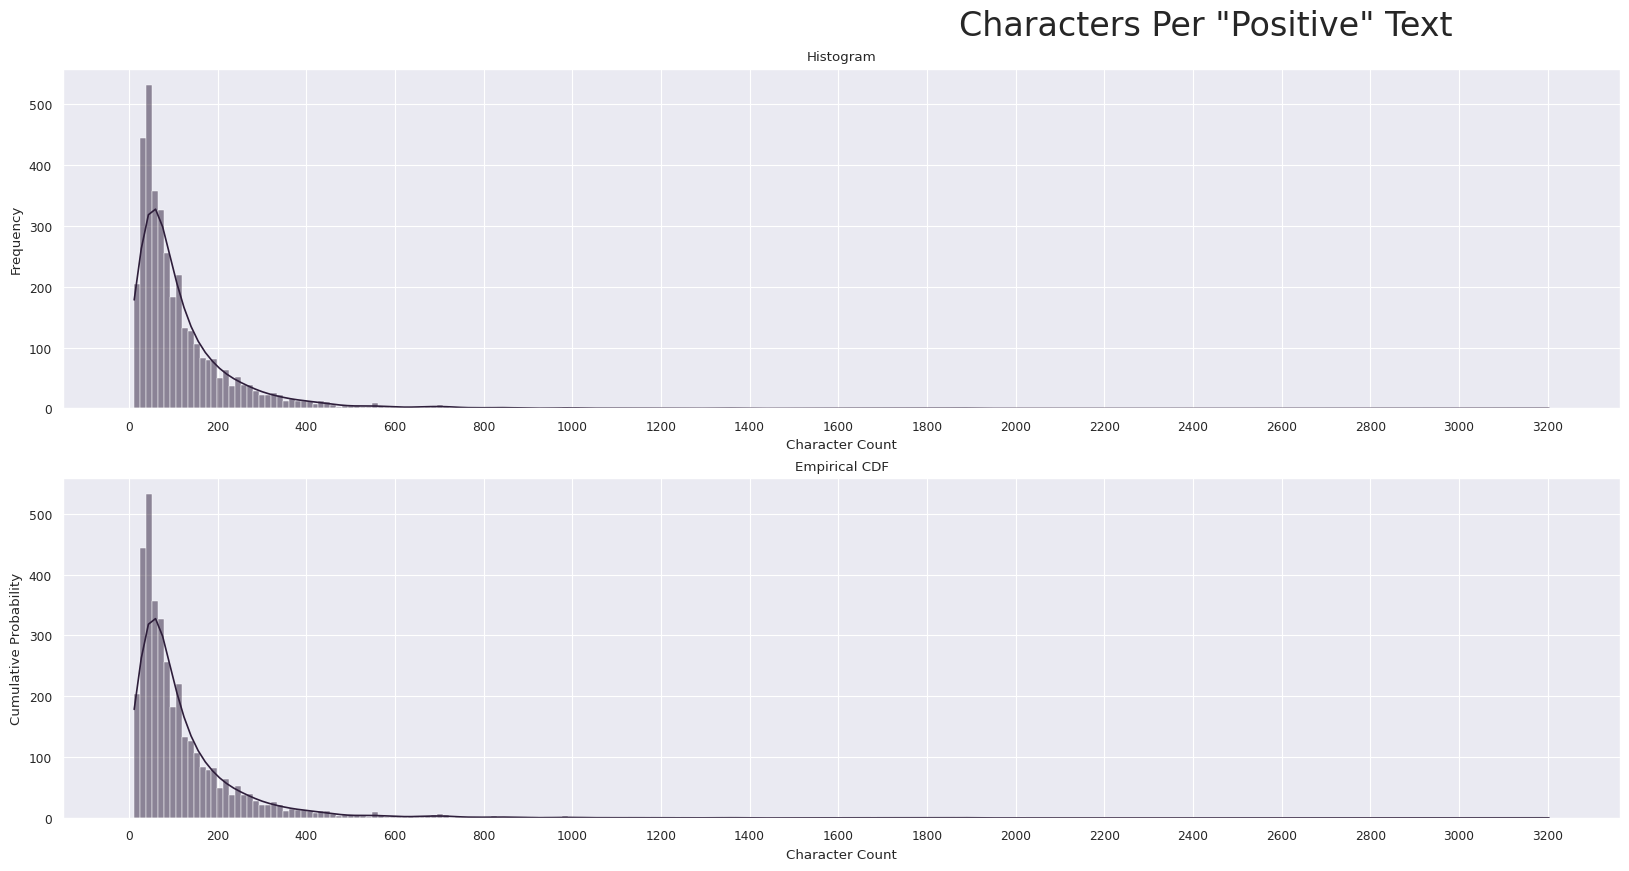

In [41]:
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Text')

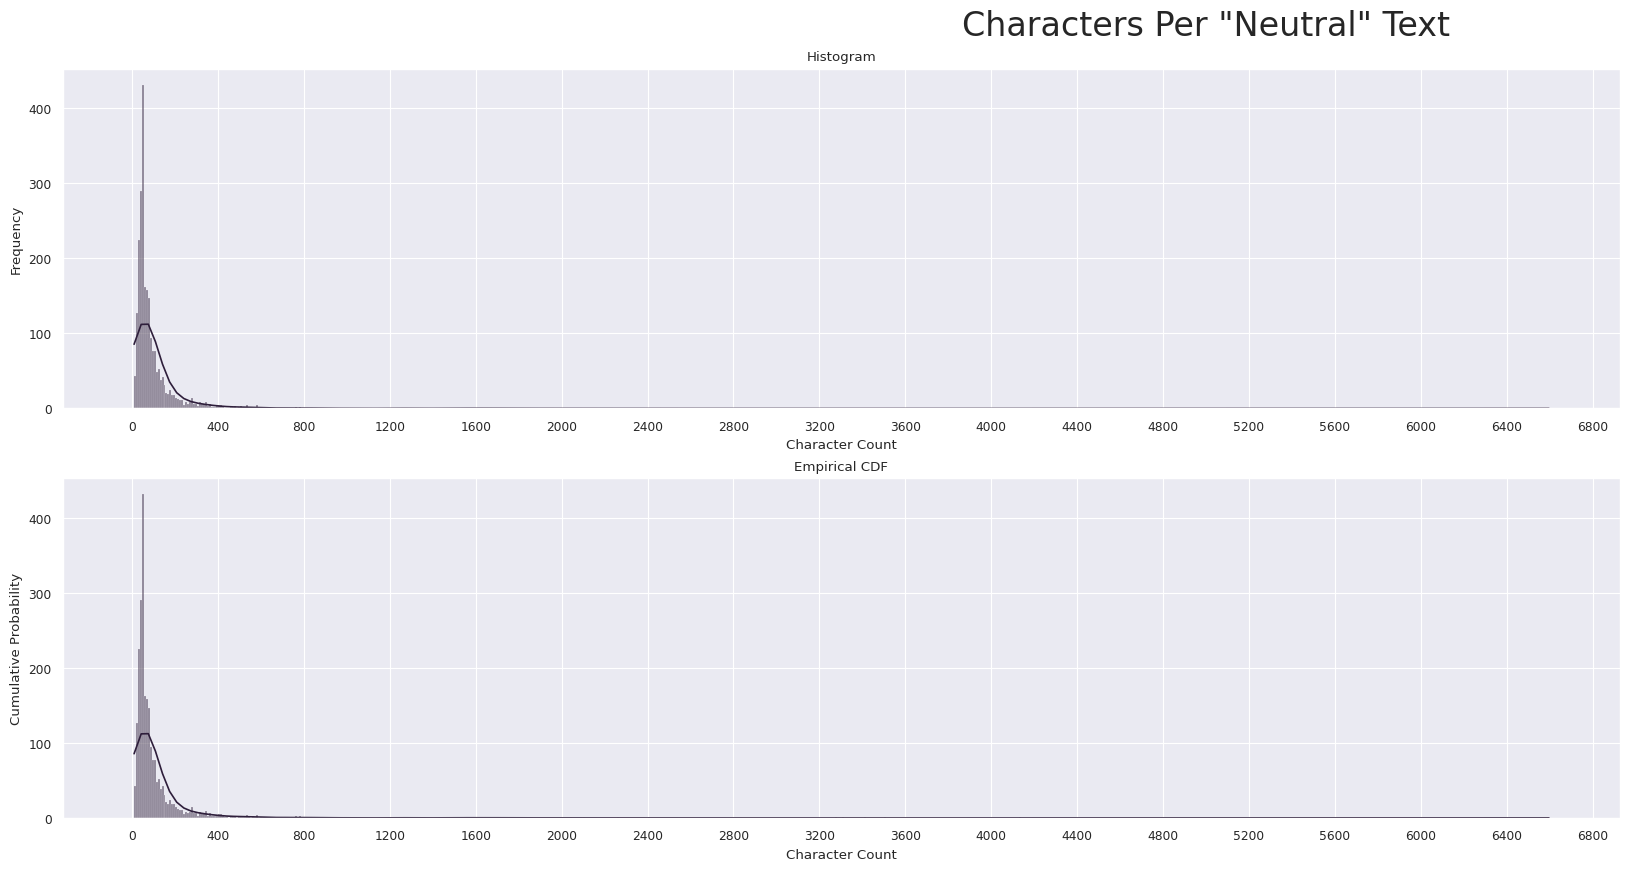

In [42]:
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Text')

# Word Counts

In [43]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.histplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], kde=True, stat="density", kde_kws=dict(cut=3))
    sns.histplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], kde=True, stat="density", kde_kws=dict(cut=3))
    sns.histplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], kde=True, stat="density", kde_kws=dict(cut=3))

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('positive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

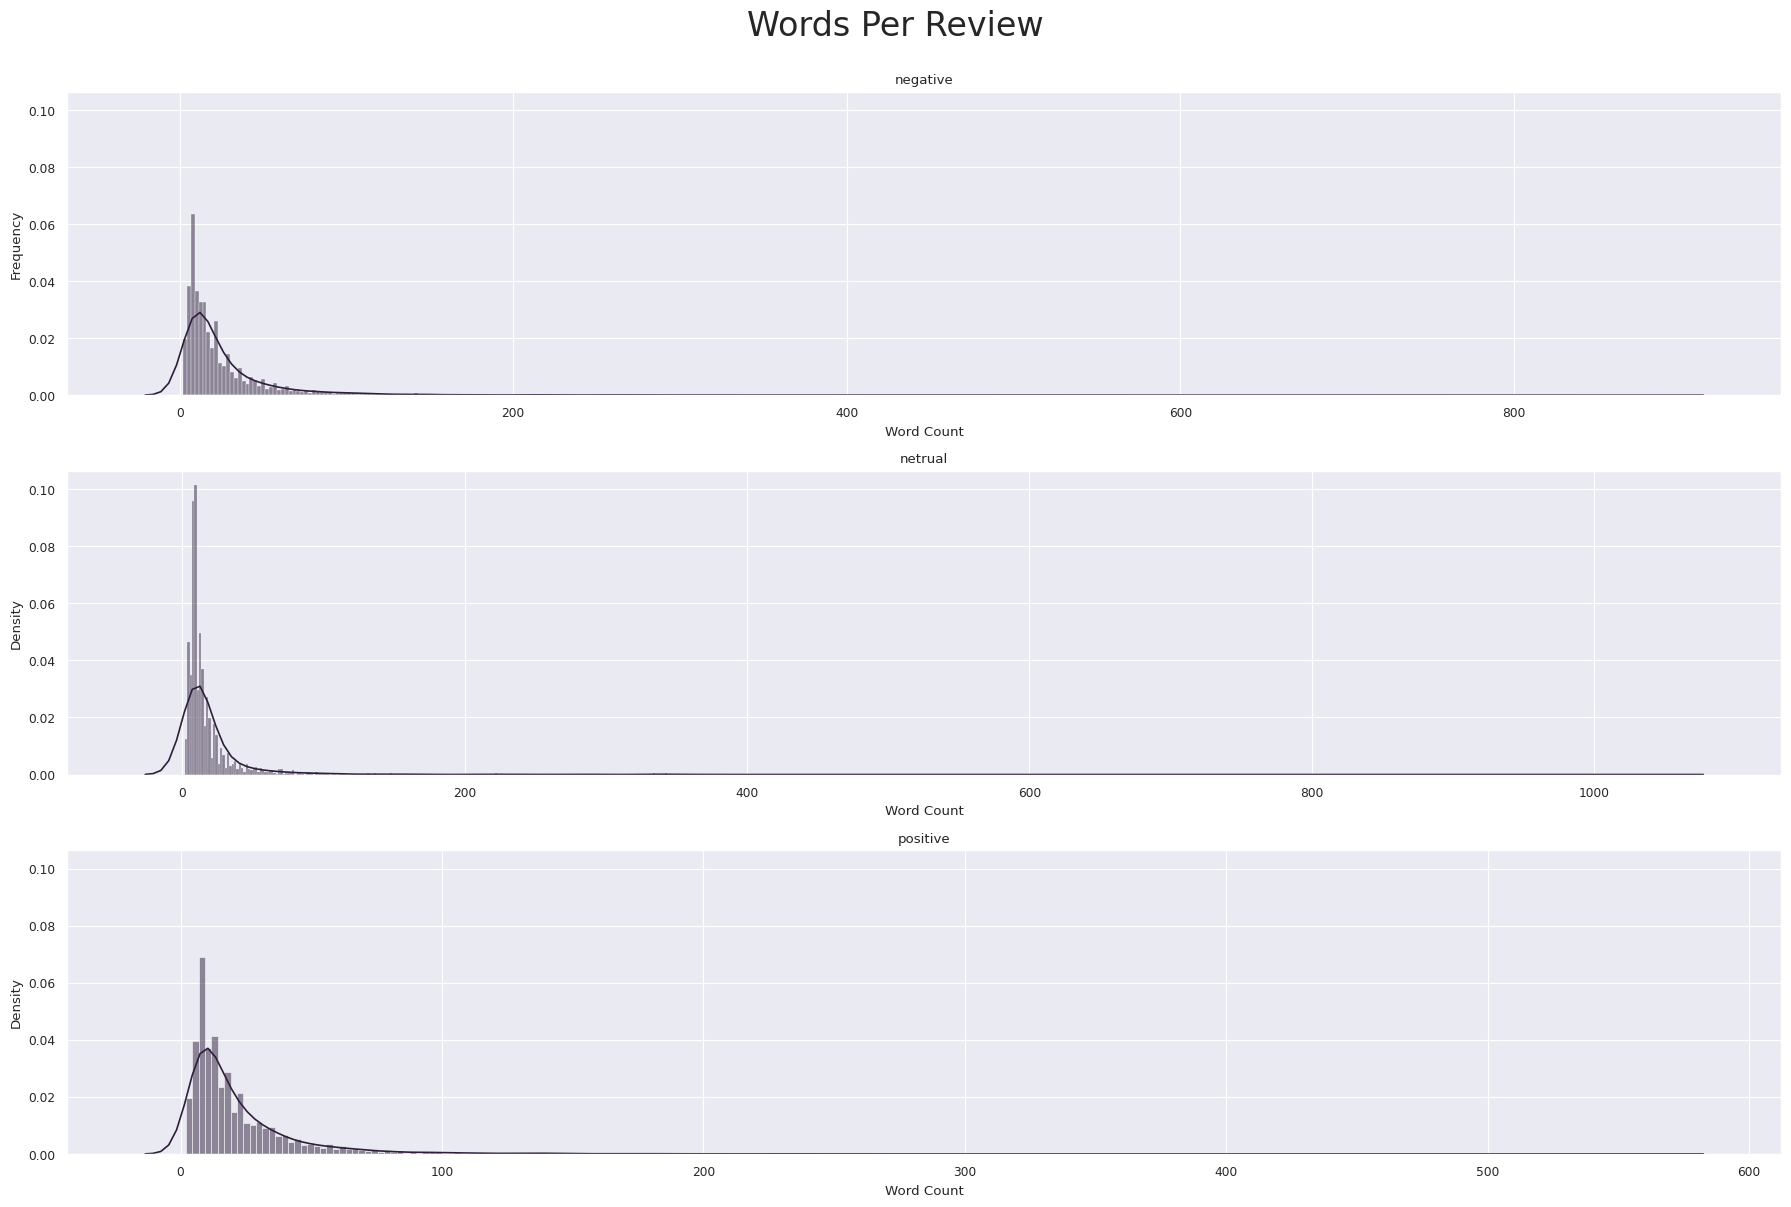

In [44]:
plot_word_number_histogram(df[df['label'] == 0]['text'],
                           df[df['label'] == 1]['text'],
                           df[df['label'] == 2]['text'],
                          )

In [45]:
# remove punk 
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_punct(x))

In [46]:
df['tokenized_text'].sample(40)

6689            las cachetadas de peter son un clásico 😅😅😅
11690    qué hipócrita la gente  hasta en ésta cojudeza...
7055     apuesto a que los que estaban ahi eran puros m...
10563    bueno la idea es protegerlos  por qué son más ...
3297                                 todavía malcriados  😡
3459     pésima esta película  sólo me quedo con asu ma...
2590                     el lechón de chupaca  buenazo   👍
9374     lo que sucede es que en su vida no han tenido ...
10773    ella no tiene la culpa de no saber bien las si...
6873                         tu y yo estamos locos lucas 😜
3765     renzo ng ya puesss  que con tu supuesto cevich...
1803     solo en perú los votantes de castillo gente si...
1736     los usa ya varios años y las costuras para niñ...
7854          grace castillo creo que hacemos una parada 🚗
6096     muñeco   ten cuidado con el soroche    anda a ...
10367       cuando no joel fregandola con su carcocha 😀😂😂😂
4503       buenaaa  programas basura al tacho de una vez

In [47]:
pd.set_option("max_colwidth", 200)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkstar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


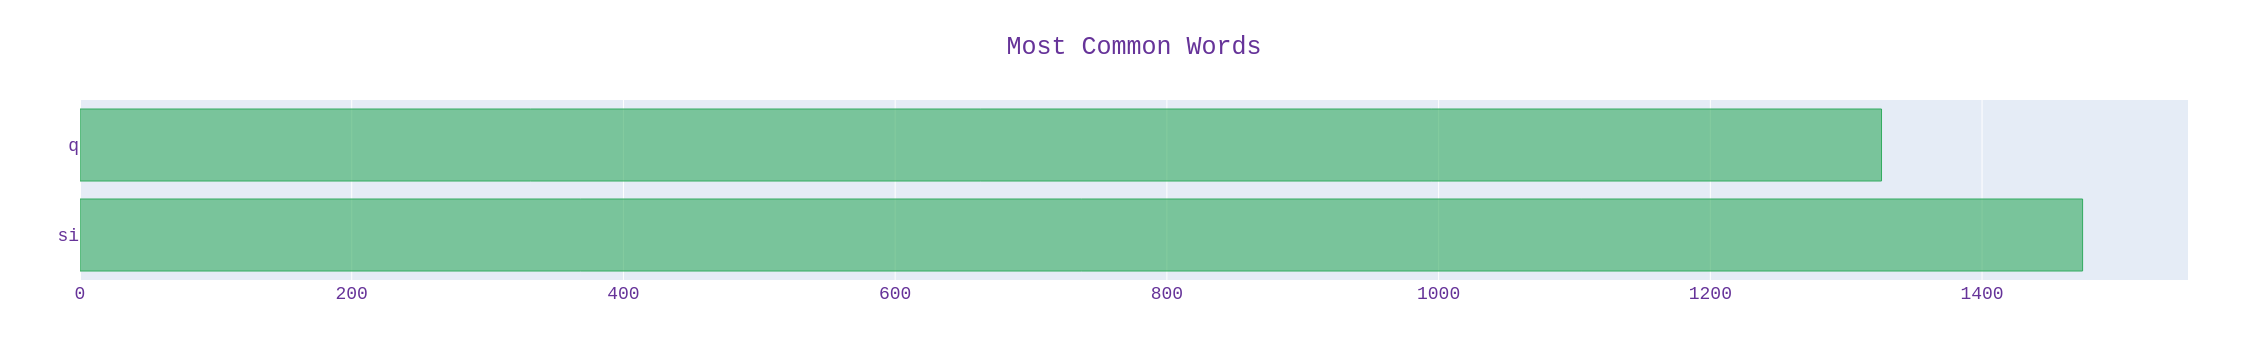

In [48]:
from collections import Counter, defaultdict

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('spanish'))
# stopWords_nltk.update([ "x", "xq","q","k","Jajajaa","perra","kieren","verga","jaja", 'si', 'Y'])

texts = df['tokenized_text']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

## Most Common ngrams

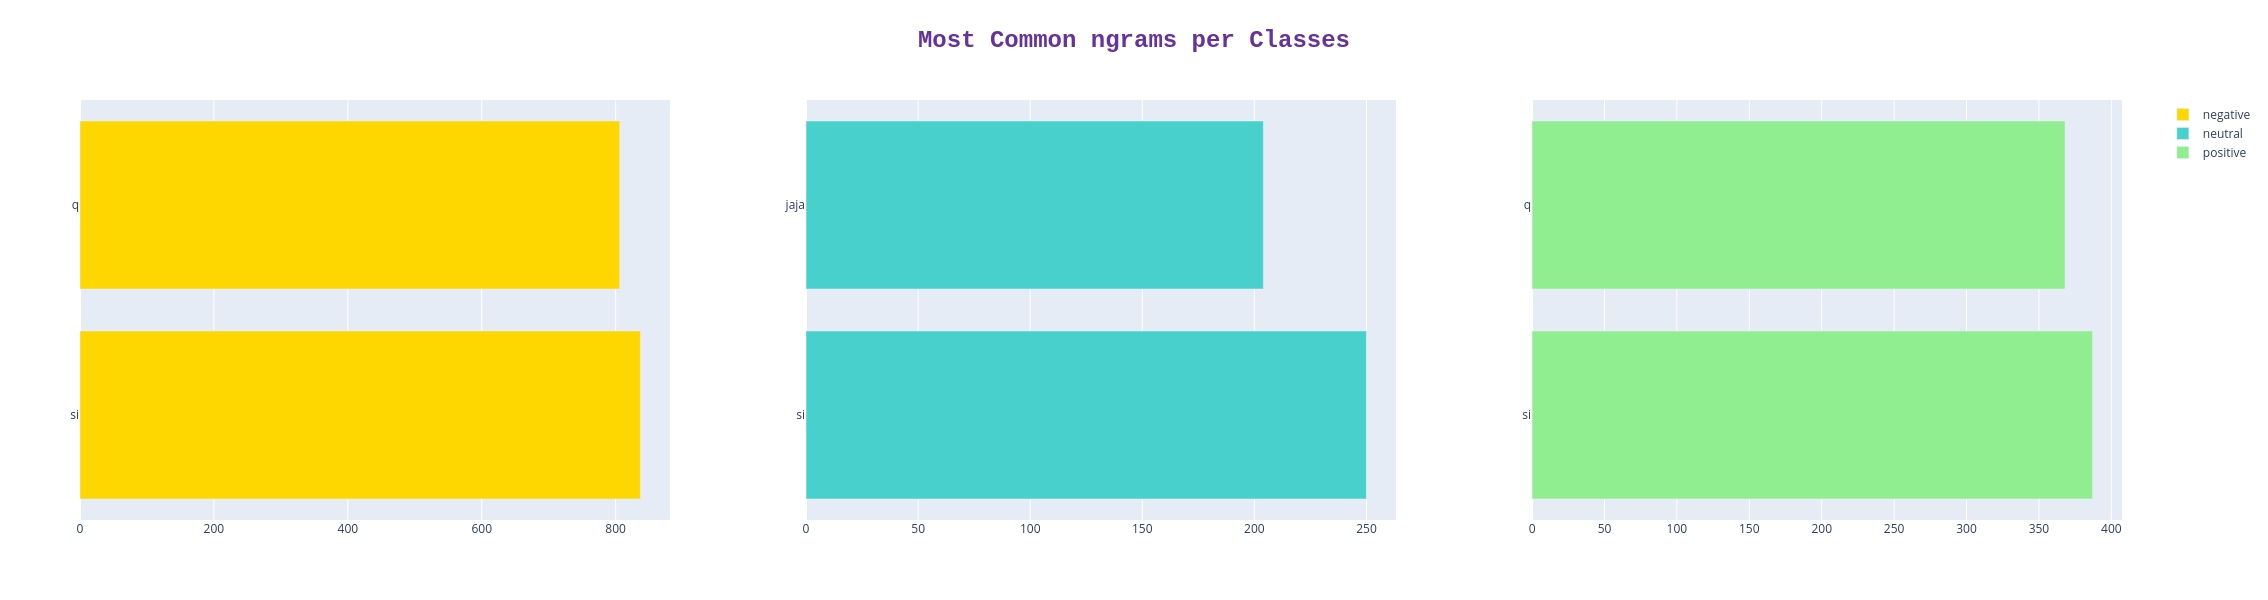

In [49]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

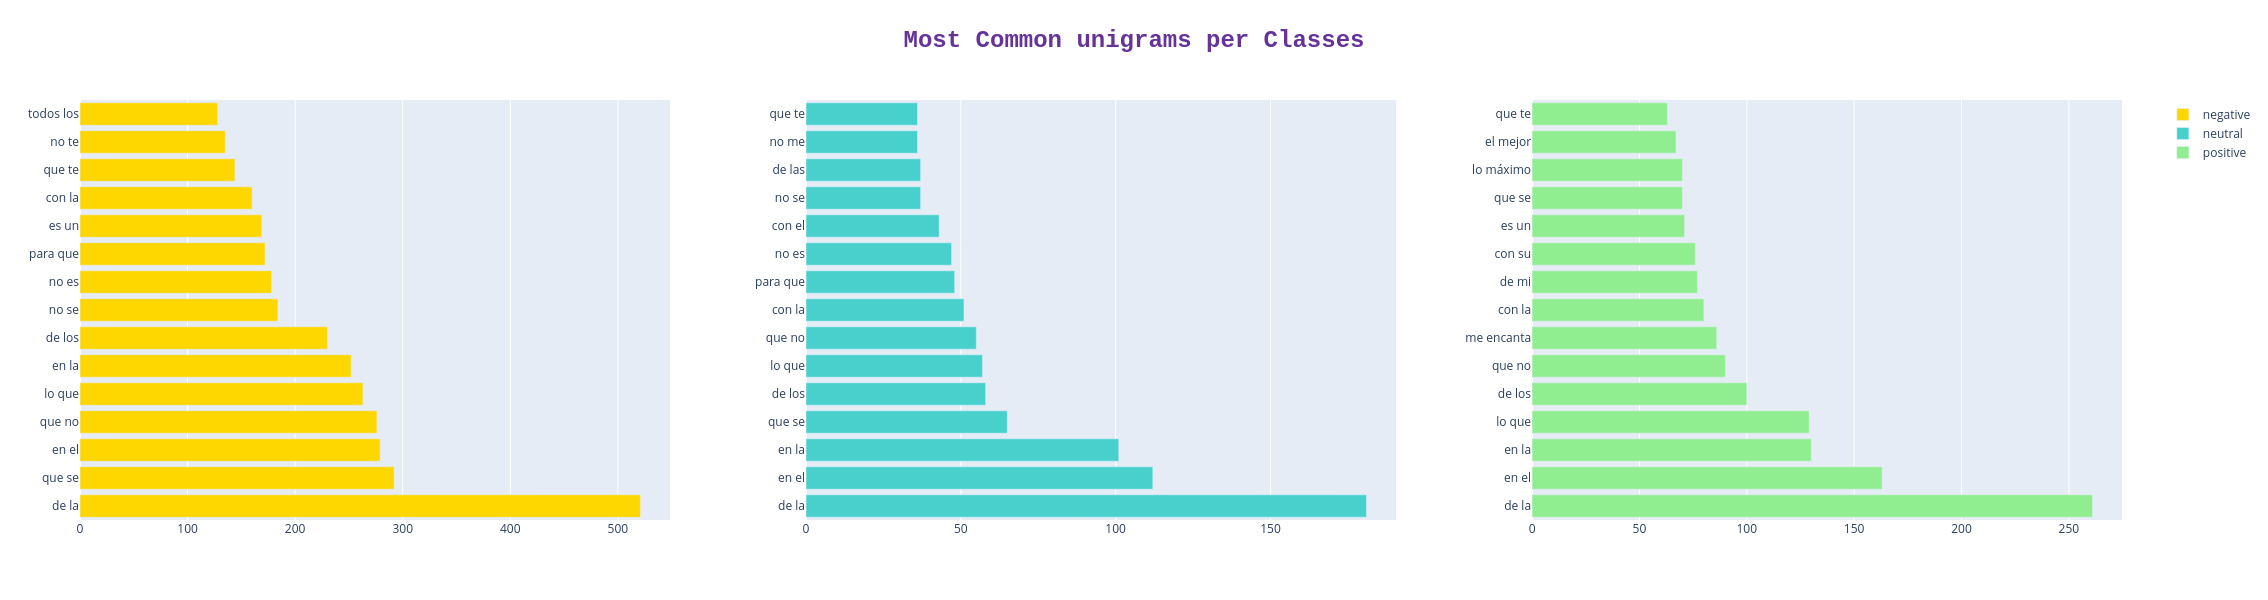

In [51]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

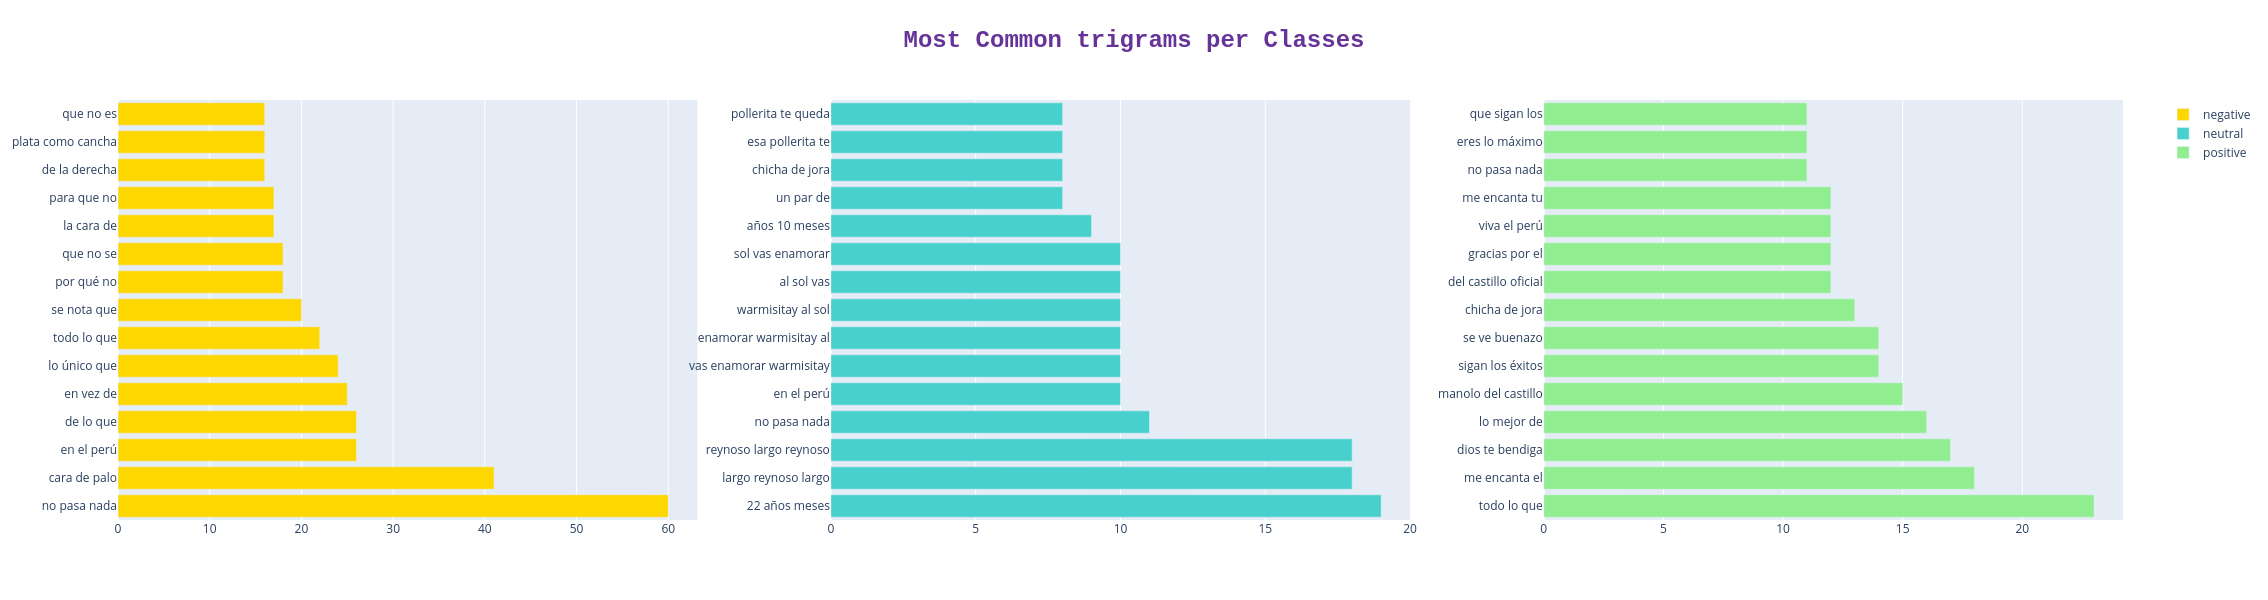

In [52]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

In [53]:
#split train test
from sklearn.model_selection import train_test_split


random_state=1
train_df_, val_df = train_test_split(df, 
                                    test_size=0.20, 
                                    random_state=random_state, 
                            stratify=df.label.values)

In [54]:

train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.20, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [55]:
train_df.to_csv('data/train.csv', index=False)
val_df.to_csv('data/val.csv', index=False)
test_df.to_csv('data/test.csv', index=False)


In [56]:
!ls -l

total 1828
-rw-rw-r-- 1 darkstar darkstar  47325 Apr 25 14:46  01-build-datasets.ipynb
-rw-rw-r-- 1 darkstar darkstar  30322 Apr 25 14:47  02-pilot-eda.ipynb
-rw-rw-r-- 1 darkstar darkstar 120399 Apr 25 13:03  03-pilot-sa-finetuned.ipynb
-rw-rw-r-- 1 darkstar darkstar 302820 Apr 25 13:03  03-pilot-train.ipynb
-rw-rw-r-- 1 darkstar darkstar  18892 Apr  7 20:04  04-pilot-train-bertuit.ipynb
-rw-rw-r-- 1 darkstar darkstar  41023 Mar 18 00:39  04-pilot-train-beto.ipynb
-rw-rw-r-- 1 darkstar darkstar  50066 Mar 17 13:39  04-pilot-train-maria.ipynb
-rw-r--r-- 1 darkstar darkstar 263345 Mar 17 13:35  BETO_for_text_classification.ipynb
-rw-rw-r-- 1 darkstar darkstar  31953 Apr 22 11:10  cm_test_predictions_percentage.png
-rw-rw-r-- 1 darkstar darkstar   2396 Apr 22 11:10  cm_test_predictions.png
drwxrwxr-x 3 darkstar darkstar   4096 Apr 25 14:46  data
-rw-rw-r-- 1 darkstar darkstar    618 Jan  9 21:00 'Emoticon filter.ipynb'
-rw-rw-r-- 1 darkstar darkstar   2137 Dec 14 00:37 'Example multiproc

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [57]:
len(train_df)

7574

In [58]:
len(val_df)

2367

In [59]:
len(test_df)

1894

In [60]:
# data_files = {"train": "data/train.csv", "validation": "data/val.csv", "test": "data/test.csv"}
# ds = load_dataset("csv", data_files=data_files)


In [61]:
#push to hugging face
#https://huggingface.co/settings/tokens
# from huggingface_hub import notebook_login
# notebook_login()

#ds.push_to_hub("jairleo95/social-media-peruvian-sentiment")